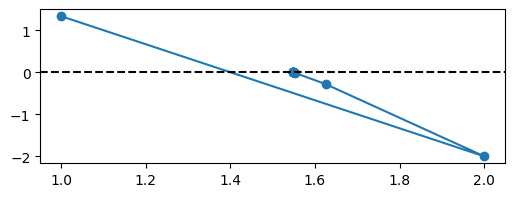

In [11]:
import matplotlib.pyplot as plt

def R(u):
    return -2 * u**2 + (8 / 3) * u + (2/3)

def du_R(u):
    return -4 * u + (8 / 3)

u = 1

u_log = []
R_log = []
dR_log = []

for i in range(10):
    u_log.append(u)
    R_log.append(R(u))
    dR_log.append(du_R(u))
    u -= R(u) / du_R(u)

plt.figure(figsize=(6,2))
plt.plot(u_log, R_log, marker="o")
plt.axhline(0, color="black", linestyle="--")

\begin{equation} \notag{}
\begin{split}
5 - 3a_1 + 2a_1a_2 = 0\\
2 + a_2 - a_1^2 = 0
\end{split}
\end{equation}

The exact solution is (1,-1) and (1.1583,-0.6583).

\begin{equation} \notag{}
\begin{split}
R_1 = 5 - 3a_1 + 2a_1a_2\\
R_2 = 2 + a_2 - a_1^2
\end{split}
\end{equation}

\begin{equation} \notag{}
\begin{split}
\partial R_1 / \partial a_1 = -3 + 2a_2\\
\partial R_1 / \partial a_2 = 2a_1\\
\partial R_2 / \partial a_1 = -2a_1\\
\partial R_2 / \partial a_2 = 1\\
\end{split}
\end{equation}

In [43]:
import numpy as np

R = lambda a: np.array([
    5 - 3*a[0] + 2*a[0]*a[1],
    2 + a[1] - a[0]**2
])

J = lambda a: np.array([
    [-3 + 2*a[1], 2*a[0]],
    [-2*a[0], 1]
])

u = np.zeros(2)

u_log = []
R_log = []
J_log = []

for i in range(7):
    u_log.append(u)
    R_log.append(R(u))
    J_log.append(J(u))

    u = u - np.linalg.inv(J(u)) @ R(u)

print(u)
for entry in u_log:
    print(entry)

[ 1. -1.]
[0. 0.]
[ 1.66666667 -2.        ]
[ 1.03603604 -1.32432432]
[ 1.01526303 -0.96967249]
[ 0.99828642 -1.00371243]
[ 0.9999818  -1.00003928]
[ 1. -1.]


---

Burgers' Equation

\begin{equation} \notag{}
\partial_t u + \partial_x \frac{u^2}{2} = \nu \partial_{xx} u
\end{equation}

Residual, at each grid point:
\begin{equation} \notag{}
R_i({u_{i+1}, u_i, u_{i-1}}) = \frac{u_i - u_i^{last}}{\Delta t} + \frac{(u_{i+1}/2)^2 - (u_{i-1}/2)^2}{2\Delta x} - \nu \frac{u_{i+1}-2u_i+u_{i-1}}{\Delta x^2}
\end{equation}

Partial derivatives, at each grid point:
\begin{equation} \notag{}
\begin{split}
\partial R / \partial u_{i+1} = \frac{u_{i+1}}{2} - \frac{\nu}{\Delta x^2}\\
\partial R / \partial u_{i} = \frac{1}{\Delta t} + \nu \frac{2}{\Delta x^2}\\
\partial R / \partial u_{i-1} = \frac{-u_{i-1}}{2} - \frac{\nu}{\Delta x^2}\\
\end{split}
\end{equation}

dx: 0.02


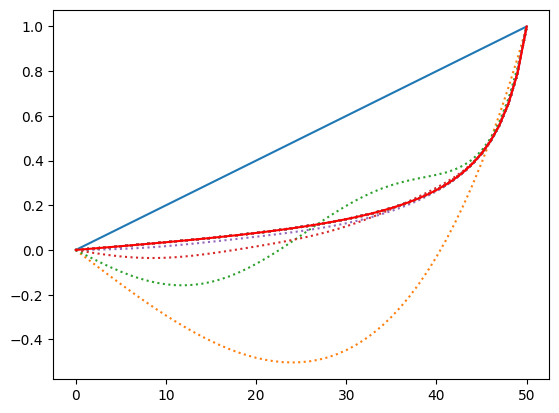

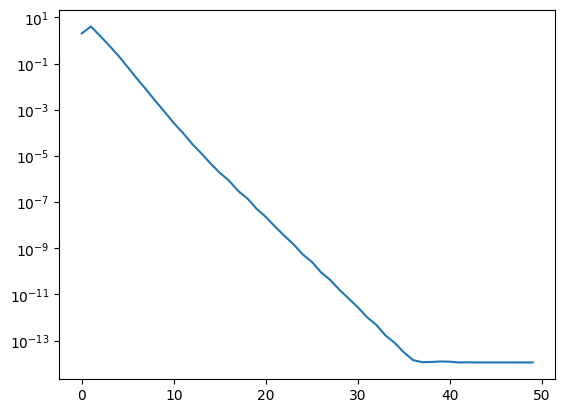

In [ ]:
L = 1
N = 51
dx = L / (N - 1)
print("dx:", dx)
D = 0.02
x_0 = 0.0
x_L = 1.0

RELAX = 0.7

grid = np.linspace(0, L, N)

def R(u):
    R = np.zeros(N)
    # interior points
    for i in range(1, N-1):
        convective_term = ((u[i+1] / 2)**2 - (u[i-1] / 2)**2) / (2 * dx)
        diffusive_term = D * (u[i+1] - 2 * u[i] + u[i-1]) / (dx**2)
        transient_term = 0
        R[i] = convective_term - diffusive_term
    # boundary points
    R[0] = u[0] - x_0
    R[-1] = u[-1] - x_L
    return R

def J(u):
    J = np.zeros((N, N))
    for i in range(1, N-1):
        J[i, i + 1] = u[i+1] / 2 - D / (dx**2)
        J[i, i] = D * 2 / (dx**2)
        J[i, i - 1] = -u[i-1] / 2 - D / (dx**2)
    # boundary points
    J[0, 0] = 1
    J[N - 1, N - 1] = 1
    return J

u = grid.copy()

u_log = []
R_log = []
J_log = []

for i in range(50):
    u_log.append(u.copy())
    R_val = R(u)
    J_val = J(u)
    R_log.append(R_val.copy())
    J_log.append(J_val.copy())
    u = u - RELAX * np.linalg.inv(J_val) @ R_val

plt.figure()
plt.plot(u_log[0])
for trace in u_log[1:-2]:
    plt.plot(trace, linestyle=":")
plt.plot(u_log[-1], color="red")

plt.figure()
plt.semilogy([np.linalg.norm(R) for R in R_log])